In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'C:/Users/Dell/Documents/4thYearProject/primary_data/Results/Test_results'
os.chdir(path)

In [3]:
def analyse_predictions(results_csv):
    df1 = pd.read_csv(results_csv)
    df1_correct1 = df1[(df1['Acc'] > 0) & (df1['Label'] > 0)] 
    df1_err1 = df1[(df1['Acc'] < 1) & (df1['Label'] > 0)]
    
    df1_correct0 = df1[(df1['Acc'] > 0) & (df1['Label'] < 1)] 
    df1_err0 = df1[(df1['Acc'] < 1) & (df1['Label'] < 1)]

    # Plot the prediction probabilities
    """
    fig1 = plt.figure(figsize=(5,5))
    ax1 = fig1.add_subplot(111)
    errs_1 = ax1.scatter(df1_err1['pr(normal)'], df1_err1['pr(abnormal)'], c='red', s=40, 
                       marker='x', label='false negative')
    correct_1 = ax1.scatter(df1_correct1['pr(normal)'], df1_correct1['pr(abnormal)'], c='green', s=40,
                       marker='+', label='true positive', alpha=0.5)
    errs_0 = ax1.scatter(df1_err0['pr(normal)'], df1_err0['pr(abnormal)'], c='purple', s=40, 
                       marker='x', label='false positive')
    correct_0 = ax1.scatter(df1_correct0['pr(normal)'], df1_correct0['pr(abnormal)'], c='blue', s=40,
                       marker='+', label='true negative', alpha=0.5)

    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax1.set_xlabel('Pr(healthy)')
    ax1.set_ylabel('Pr(asthma)')
    ax1.set_title(results_csv)
    plt.legend()
    """
    return df1

Bin class 1 (probability of abnormality/respiratory function) predition values for each test set

In [4]:
def plot_exp_pdf(ax, rate=1, flip=False, epsilon=0):
    x = np.arange(0, 1, 0.0001)
    if flip:
        f = rate*np.exp(-rate*(1-x)) + epsilon
    else:
        f = rate*np.exp(-rate*x) + epsilon
        
    ax.plot(x, f, alpha=0.6, c='black')

In [5]:
from scipy.stats import beta

def plot_beta_pdf(ax, a, b):
    x = np.arange(0, 1, 0.0001)
    y = beta.pdf(x, a, b)
    
    l = ax.plot(x, y, alpha=0.6, label='alpha: %.1f, beta: %.1f' % (a,b))
    
    return l

<IPython.core.display.Javascript object>


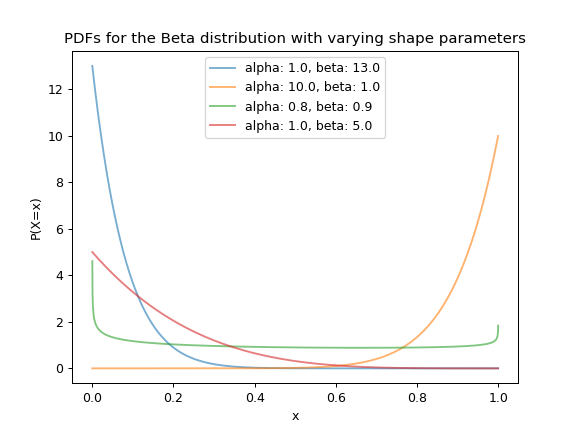

In [118]:
fig, ax = plt.subplots()
l1 = plot_beta_pdf(ax, 1, 13)
l2 = plot_beta_pdf(ax, 10, 1)
l4 = plot_beta_pdf(ax, 0.8, 0.9)
l4 = plot_beta_pdf(ax, 1, 5)

ax.set_xlabel('x')
ax.set_ylabel('P(X=x)')
ax.set_title('PDFs for the Beta distribution with varying shape parameters')

plt.legend()


In [114]:
def plot_pdf_by_class(df, name, binsize, split_class=1, labels=['Normals', 'Abnormals'], cpdf=False):
    
    if split_class == 1:
        df0 = df[df['Label'] == 0]
        df1 = df[df['Label'] == 1]


        fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 5))
        ## area under histograms normalised using density and stack params
        if len(df0) > 0:
            hist0 = df0['pr(abnormal)'].hist(bins=binsize, alpha=0.5, label=labels[0], edgecolor='black',
                                          density=True, ax=ax1, color='blue', cumulative=cpdf)
            l0 = ax1.axvline(df0['pr(abnormal)'].mean(), color='k', linestyle='dashed', linewidth=1,
                            label='Mean predicted value=%0.3f' % df0['pr(abnormal)'].mean())
            
            ax1.set_xlabel('y = Pr(COPD) assigned by clf')
            ax1.set_ylabel('Pr(Y<y|D, w=normal)')
            ax1.legend()

        if len(df1) > 0:
            hist1 = df1['pr(abnormal)'].hist(bins=binsize, alpha=0.5, label=labels[1], edgecolor='black',
                                          density=True, ax=ax2, color='red', cumulative=cpdf)
            l1 = ax2.axvline(df1['pr(abnormal)'].mean(), color='k', linestyle='dashed', linewidth=1,
                            label='Mean predicted value=%0.3f' % df1['pr(abnormal)'].mean())
            
            ax2.set_xlabel('y = Pr(COPD) assigned by clf')
            ax2.set_ylabel('Pr(Y<y|D, w=COPD)')
            
    else:
        fig, (ax1) = plt.subplots(1,1)
        hist = df['pr(abnormal)'].hist(bins=binsize, alpha=0.5, label=name, edgecolor='black',
                                          density=True, ax=ax1, color='red', cumulative=cpdf)
        l1 = ax1.axvline(df['pr(abnormal)'].mean(), color='k', linestyle='dashed', linewidth=1,
                        label='Mean predicted value=%0.3f' % df['pr(abnormal)'].mean())
     
        ax1.set_xlabel('y = Pr(asthma) assigned by clf')
        ax1.set_ylabel('Pr(y|D, w=post br)')
        
        
    plt.title('%s predictions cPDF estimates by class' % name, loc='center')
    plt.legend()

# 1. Asthma analysis

In [8]:
n1 = 'slp_filters41noncohort_testresults.csv'

In [9]:
%matplotlib notebook
df_noncohort = analyse_predictions(n1)

In [10]:
n2 = 'slp_filters41adult_asthma_testresults.csv'
df_aa = analyse_predictions(n2)

In [11]:
n3 = 'slp_filters41acute_asthma_testresults.csv'
df_ac = analyse_predictions(n3)

In [12]:
n4 = 'slp_filters41stable_asthma_testresults.csv'
df_stbl = analyse_predictions(n4)

In [13]:
binsize = 20

<IPython.core.display.Javascript object>


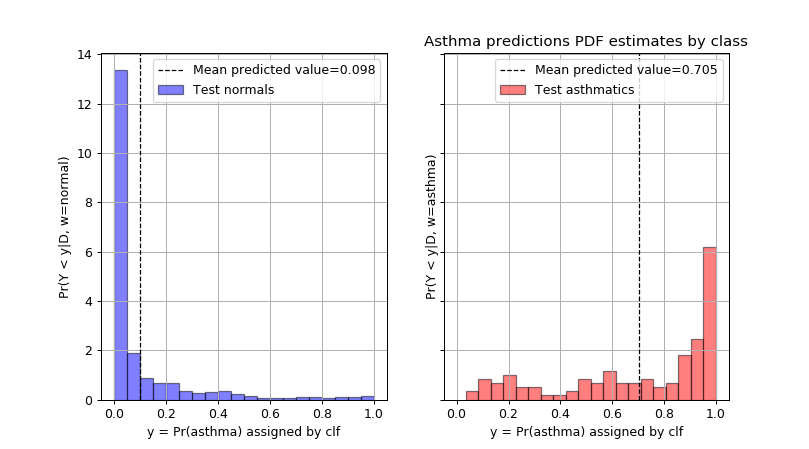

In [98]:
plot_pdf_by_class(df_noncohort, 'Asthma', binsize, labels=["Test normals", "Test asthmatics"])

<IPython.core.display.Javascript object>


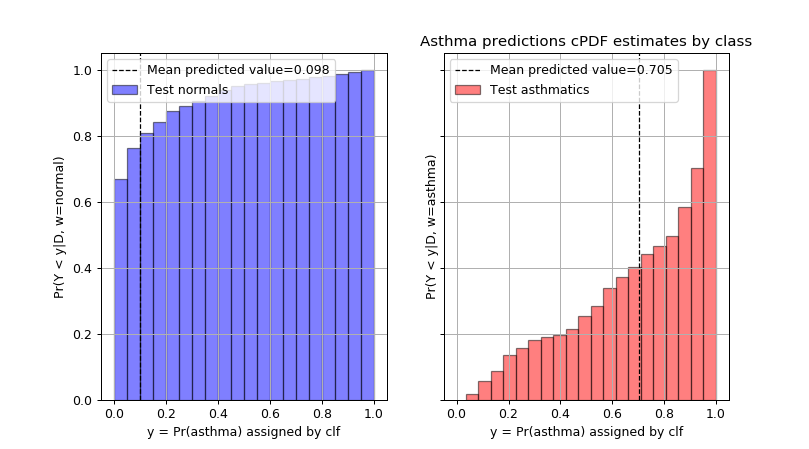

In [96]:
plot_pdf_by_class(df_noncohort, 'Asthma', binsize, cpdf=True, labels=["Test normals", "Test asthmatics"])

<IPython.core.display.Javascript object>


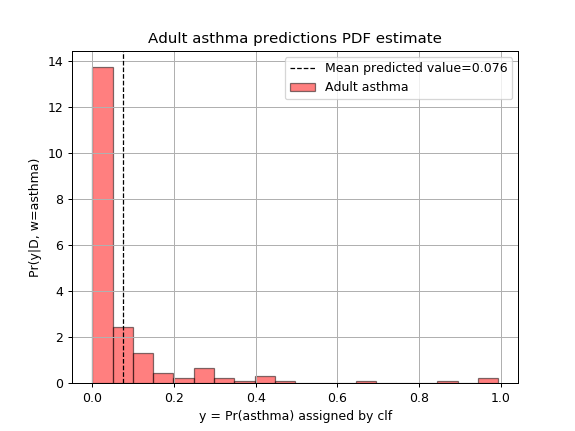

In [102]:
plot_pdf_by_class(df_aa, 'Adult asthma', binsize, split_class=0)

<IPython.core.display.Javascript object>


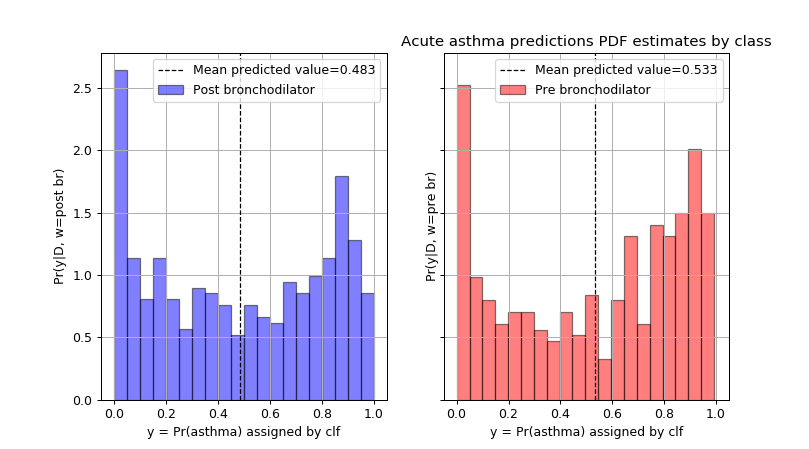

In [106]:
plot_pdf_by_class(df_ac, 'Acute asthma', binsize, labels=['Post bronchodilator', 'Pre bronchodilator'])

<IPython.core.display.Javascript object>


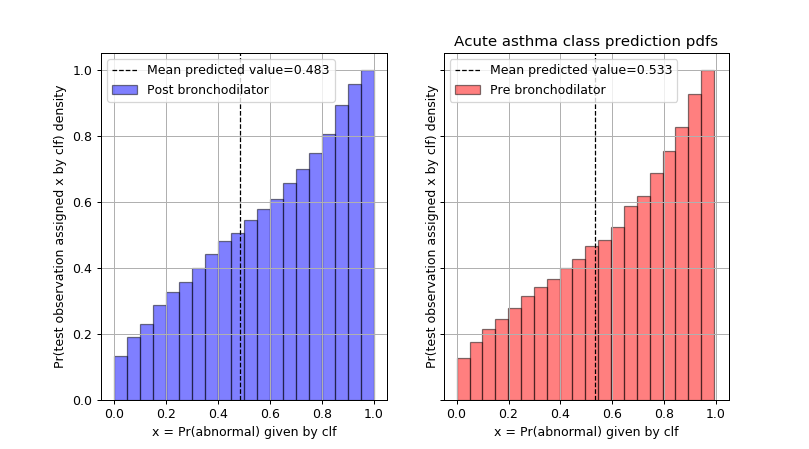

In [18]:
plot_pdf_by_class(df_ac, 'Acute asthma', binsize, labels=['Post bronchodilator', 'Pre bronchodilator'], cpdf=True)

<IPython.core.display.Javascript object>


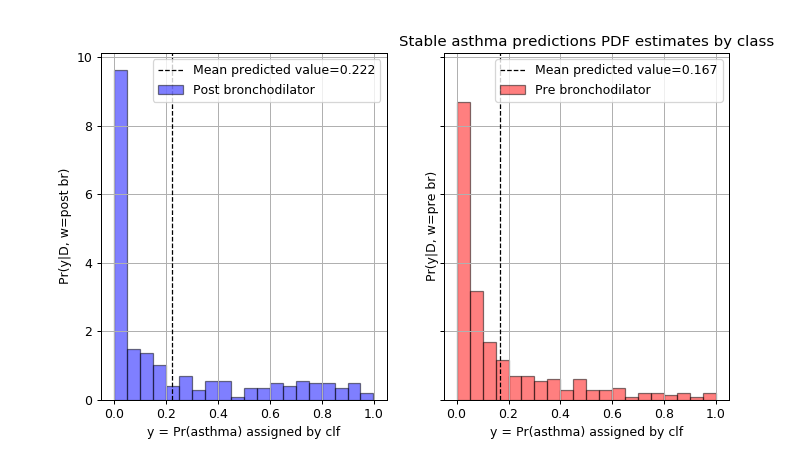

In [107]:
plot_pdf_by_class(df_stbl, 'Stable asthma', binsize, labels=['Post bronchodilator', 'Pre bronchodilator'])

<IPython.core.display.Javascript object>


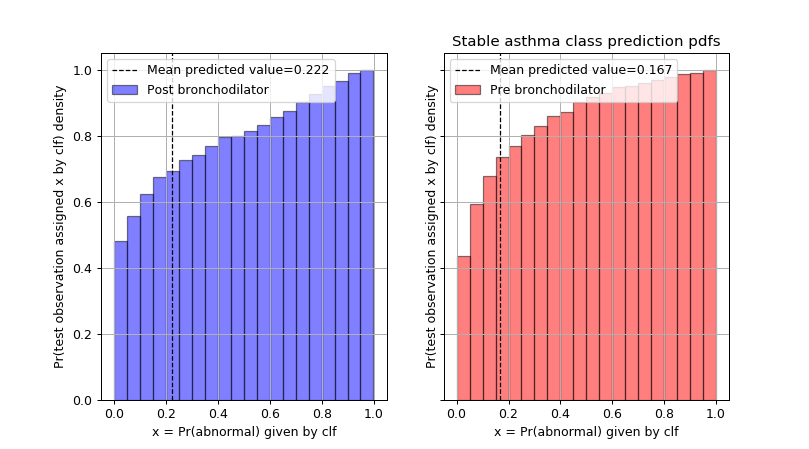

In [20]:
plot_pdf_by_class(df_stbl, 'Stable asthma', binsize, labels=['Post bronchodilator', 'Pre bronchodilator'], 
                 cpdf=True)

# 2. COPD  analysis

In [59]:
n5 = 'COPD_filters58_testresults.csv'
df_copd = analyse_predictions(n5)

<IPython.core.display.Javascript object>


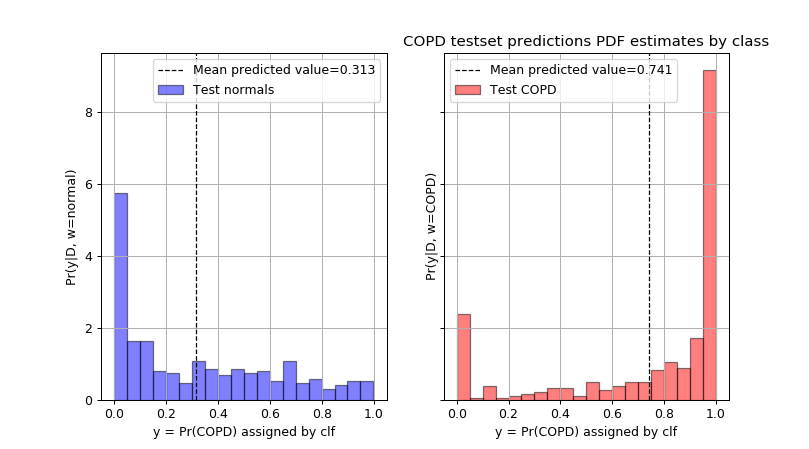

In [113]:
plot_pdf_by_class(df_copd, 'COPD testset', binsize, labels=["Test normals", "Test COPD"])

<IPython.core.display.Javascript object>


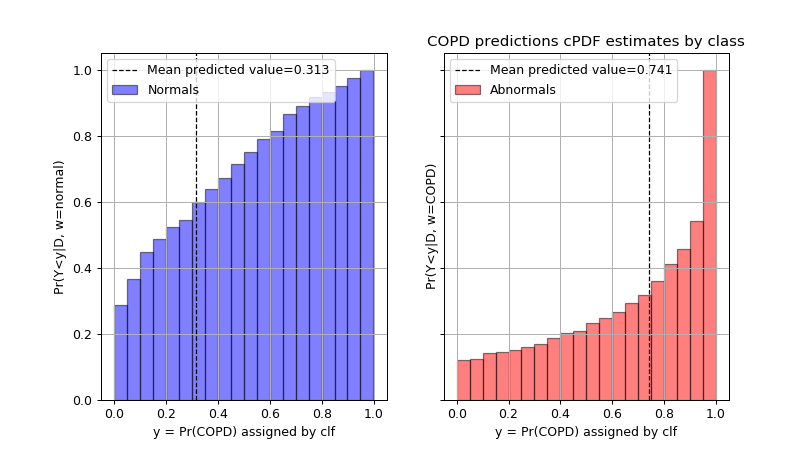

In [115]:
plot_pdf_by_class(df_copd, 'COPD', binsize, cpdf=True)

# ROC & AUC calculations

In [36]:
from sklearn import metrics

In [25]:
def plot_roc(df, clf_name, thr_low, thr_high):
    labels = df['Label'].values
    predictions = df['pr(abnormal)'].values
    
    fpr, tpr, thresholds = metrics.roc_curve(labels, predictions, pos_label=1)
    auc = metrics.roc_auc_score(labels, predictions)
    print("Auc: ", auc)
    
    fig, (ax) = plt.subplots(1, 1)
    ax.plot(fpr, tpr, color='orange', label='CNN ROC curve (area = %0.2f)' % auc)
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random model ROC curve')
    idx = np.where((thr_low<thresholds) & (thresholds<thr_high))[0]
    ax.plot(fpr[idx], tpr[idx], 'o', color='red', label='Operating point')
    print('Op point: ', fpr[idx], tpr[idx])
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(clf_name + ' Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return thresholds

Auc:  0.8097685185185185


<IPython.core.display.Javascript object>


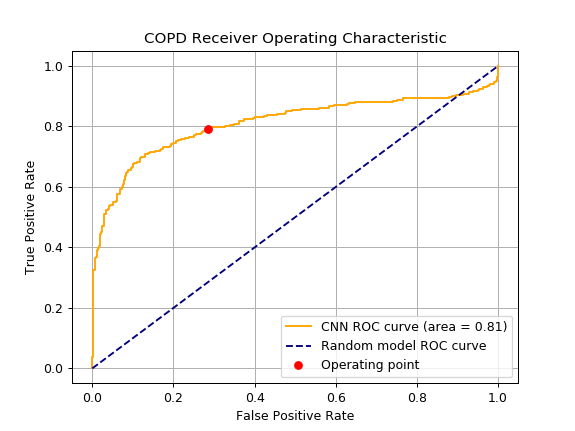

Op point:  [0.28611111] [0.79166667]


In [74]:
thr_copd = plot_roc(df_copd, 'COPD', 0.495, 0.504)
plt.grid()

Auc:  0.9498713023190942


<IPython.core.display.Javascript object>


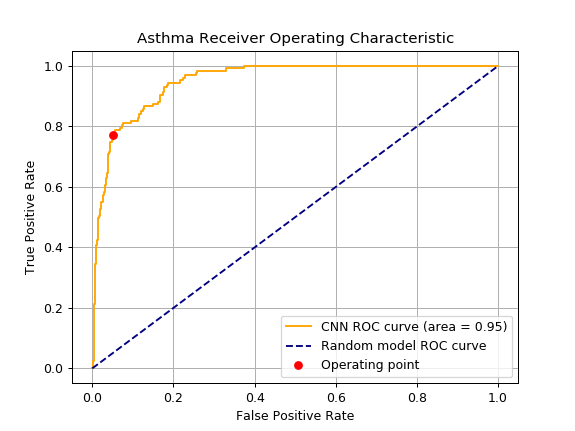

Op point:  [0.04991948] [0.77165354]


In [119]:
thr_as = plot_roc(df_noncohort, 'Asthma', 0.495, 0.505)
plt.grid()

# 3. Predictions over asthma patient history

<IPython.core.display.Javascript object>


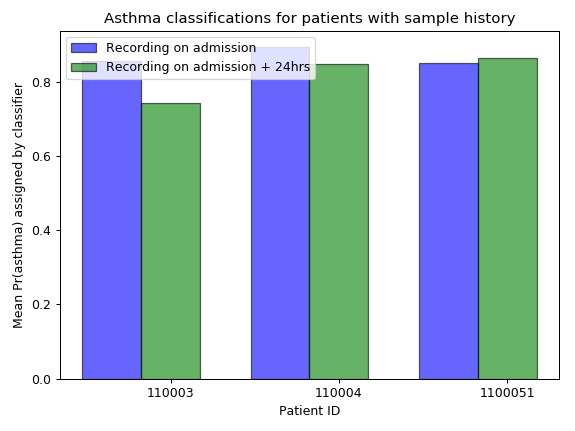

In [111]:
rec_1 = [0.857351195, 0.894129123, 0.852133749]
rec_2 = [0.743591019, 0.848677087, 0.865224063]
n_patients = 3
patient_ids = ['110003', '110004', '1100051']

fix, ax = plt.subplots()
index = np.arange(n_patients)
bar_width = 0.35
opacity = 0.6

rects1 = plt.bar(index, rec_1, bar_width,
alpha=opacity,
color='b',
label='Recording on admission',
                edgecolor='black')

rects2 = plt.bar(index + bar_width, rec_2, bar_width,
alpha=opacity,
color='g',
label='Recording on admission + 24hrs',
                edgecolor='black')

plt.xlabel('Patient ID')
plt.ylabel('Mean Pr(asthma) assigned by classifier')
plt.title('Asthma classifications for patients with sample history')
plt.xticks(index + bar_width, patient_ids)
plt.legend()

plt.tight_layout()
plt.show()